# Feedforward 🥸

taken from neural_networks_tutorial

In [2]:
from preprocessing_utility import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import activations, layers, optimizers, losses

In [25]:
train,test=ready_to_be_used_dataset(42,image_squared_size=100)

Found 23404 files belonging to 2 classes.
Using 18724 files for training.
Found 23404 files belonging to 2 classes.
Using 4680 files for validation.


Let's look at the images given to feed the network

In [26]:
image_batch, labels_batch = next(iter(train))

(-0.5, 99.5, 99.5, -0.5)

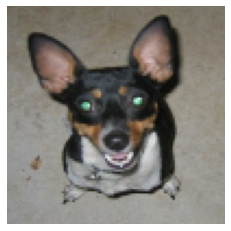

In [27]:
img=tensor_to_image(image_batch[0])
plt.imshow(img)
plt. axis('off')

#### Model1 definition

In [9]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(100, 100,3)),
    layers.Dense(500, activation="relu"),
    layers.Dense(2, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_2 (Dense)             (None, 500)               15000500  
                                                                 
 dense_3 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 15,001,502
Trainable params: 15,001,502
Non-trainable params: 0
_________________________________________________________________


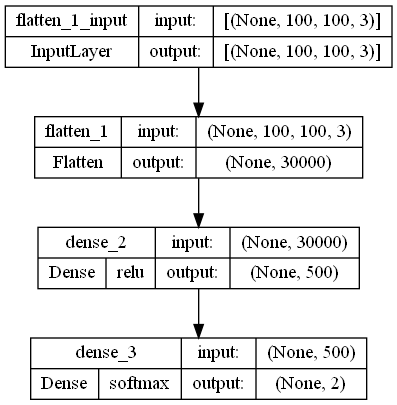

In [10]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [11]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#### Training

In [13]:
%%time
history=model.fit(
  train,
  validation_data=test,
  epochs=5
)

Epoch 1/5
446/446 [==============================] - 56s 124ms/step - loss: 0.6372 - accuracy: 0.6400 - val_loss: 0.7112 - val_accuracy: 0.5513
Epoch 2/5
446/446 [==============================] - 57s 128ms/step - loss: 0.6393 - accuracy: 0.6335 - val_loss: 0.6416 - val_accuracy: 0.6303
Epoch 3/5
446/446 [==============================] - 56s 124ms/step - loss: 0.6380 - accuracy: 0.6318 - val_loss: 0.6438 - val_accuracy: 0.6179
Epoch 4/5
446/446 [==============================] - 54s 120ms/step - loss: 0.6384 - accuracy: 0.6341 - val_loss: 0.6425 - val_accuracy: 0.6267
Epoch 5/5
446/446 [==============================] - 58s 130ms/step - loss: 0.6368 - accuracy: 0.6310 - val_loss: 0.6479 - val_accuracy: 0.6303
Wall time: 4min 42s


#### Performance evaluation

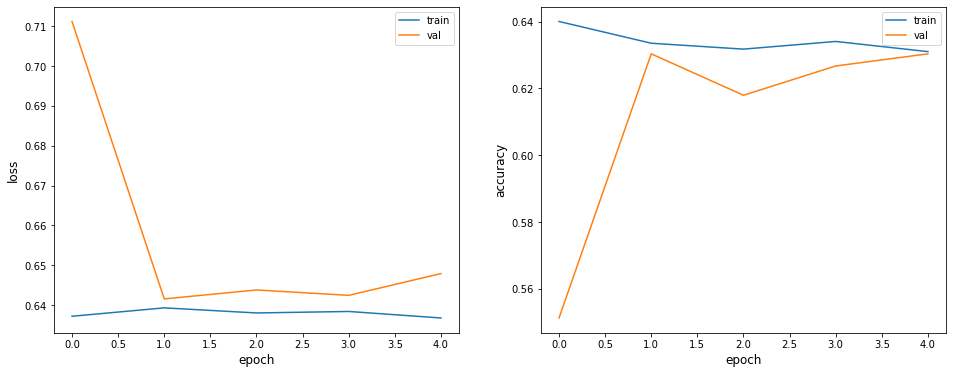

In [14]:
def performance_plot(history):
    plt.figure(figsize=(16, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['train', 'val'], fontsize=10)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['train', 'val'], fontsize=10)

    plt.show()

performance_plot(history)

#### Model2 definition

In [15]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(100, 100,3)),
    layers.Dense(2000, activation="relu"),
    layers.Dense(2, activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_4 (Dense)             (None, 2000)              60002000  
                                                                 
 dense_5 (Dense)             (None, 2)                 4002      
                                                                 
Total params: 60,006,002
Trainable params: 60,006,002
Non-trainable params: 0
_________________________________________________________________


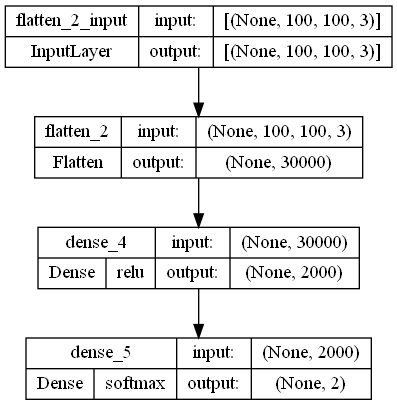

In [16]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [17]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#### Training

In [19]:
%%time
history=model.fit(
  train,
  validation_data=test,
  epochs=5
)

Epoch 1/5
446/446 [==============================] - 177s 397ms/step - loss: 1.2956 - accuracy: 0.5564 - val_loss: 0.9705 - val_accuracy: 0.5331
Epoch 2/5
446/446 [==============================] - 169s 379ms/step - loss: 0.6859 - accuracy: 0.6058 - val_loss: 0.6441 - val_accuracy: 0.6235
Epoch 3/5
446/446 [==============================] - 187s 419ms/step - loss: 0.6516 - accuracy: 0.6184 - val_loss: 0.6424 - val_accuracy: 0.6284
Epoch 4/5
446/446 [==============================] - 244s 546ms/step - loss: 0.6390 - accuracy: 0.6329 - val_loss: 0.6528 - val_accuracy: 0.6177
Epoch 5/5
446/446 [==============================] - 211s 473ms/step - loss: 0.6394 - accuracy: 0.6306 - val_loss: 0.6429 - val_accuracy: 0.6269
Wall time: 16min 29s


#### Performance evaluation

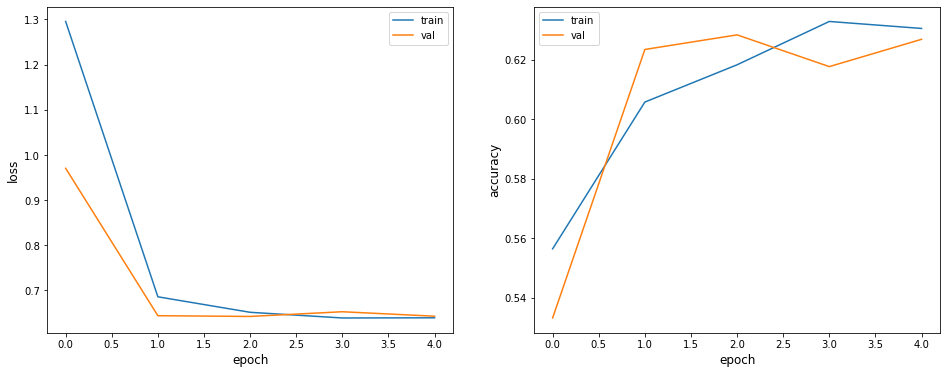

In [20]:
performance_plot(history)

#### Model3 definition

In [21]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(100, 100,3)),
    layers.Dense(1500, activation="relu"),
    layers.Dense(500, activation="relu"),
    layers.Dense(2, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_6 (Dense)             (None, 1500)              45001500  
                                                                 
 dense_7 (Dense)             (None, 500)               750500    
                                                                 
 dense_8 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 45,753,002
Trainable params: 45,753,002
Non-trainable params: 0
_________________________________________________________________


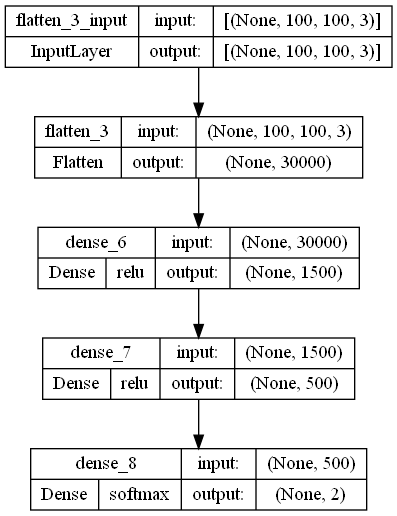

In [22]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [23]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#### Training

In [24]:
%%time
history=model.fit(
  train,
  validation_data=test,
  epochs=5
)

Epoch 1/5
446/446 [==============================] - 167s 371ms/step - loss: 1.9416 - accuracy: 0.5569 - val_loss: 0.7107 - val_accuracy: 0.5244
Epoch 2/5
446/446 [==============================] - 154s 344ms/step - loss: 0.6802 - accuracy: 0.5791 - val_loss: 0.6581 - val_accuracy: 0.6083
Epoch 3/5
446/446 [==============================] - 142s 317ms/step - loss: 0.6664 - accuracy: 0.5926 - val_loss: 0.6620 - val_accuracy: 0.5872
Epoch 4/5
446/446 [==============================] - 145s 325ms/step - loss: 0.6600 - accuracy: 0.6057 - val_loss: 0.6702 - val_accuracy: 0.5865
Epoch 5/5
446/446 [==============================] - 147s 330ms/step - loss: 0.6635 - accuracy: 0.5992 - val_loss: 0.6698 - val_accuracy: 0.6006
Wall time: 12min 35s


#### Performance evaluation

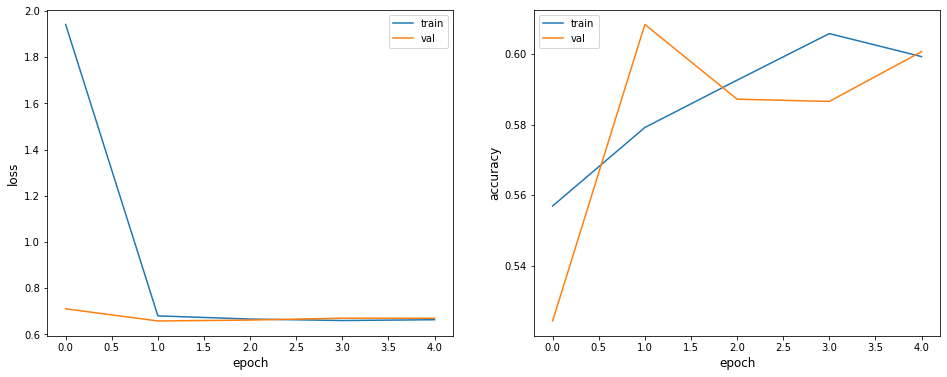

In [25]:
performance_plot(history)